In [1]:
import os
import re
import glob
import random
import numpy as np
import scipy
import scipy.io as sio
import scipy.ndimage as ndimage
from scipy.ndimage import gaussian_filter1d
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as patches
from matplotlib.patches import Patch, Circle
from matplotlib.lines import Line2D
from PIL import Image
import ipywidgets as ipw
from ipywidgets import interact, interactive, fixed, interact_manual  # package for interactive widgets 
import braingeneers                                                   # Braingeneers code
from braingeneers.analysis.analysis import SpikeData, read_phy_files
import braingeneers.data.datasets_electrophysiology as ephys
from IPython.display import HTML, display, Javascript, clear_output
from matplotlib.patches import FancyArrow

In [2]:
sd = read_phy_files('/home/jovyan/work/Human_Hippocampus/data/ephys/2023-04-02-e-hc328_unperturbed/derived/kilosort2/hc3.28_hckcr1_chip16835_plated34.2_rec4.2_curated.zip')

/tmp/ipykernel_331763/473825948.py:1: DeprecationWarning: Call to deprecated function (or staticmethod) read_phy_files. (Prefer load_spike_data()) -- Deprecated since version 0.1.13.
  sd = read_phy_files('/home/jovyan/work/Human_Hippocampus/data/ephys/2023-04-02-e-hc328_unperturbed/derived/kilosort2/hc3.28_hckcr1_chip16835_plated34.2_rec4.2_curated.zip')


In [3]:
def plot_sttc(sd):
    sttc = np.zeros((sd.N, sd.N))
    for i in range(sd.N):
        for j in range(sd.N):
            sttc[i][j] = sd.spike_time_tiling(i,j)
    plt.imshow(sttc)
    plt.xlabel("Neuron index")
    plt.ylabel("Neuron index")
    plt.show()

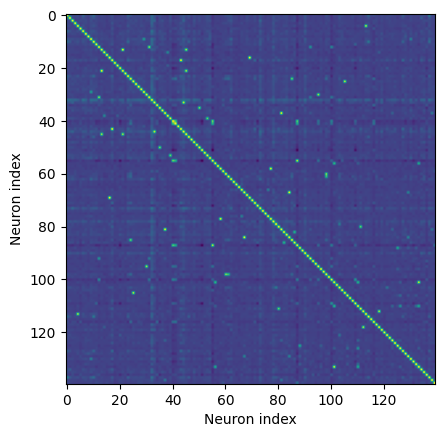

In [4]:
plot_sttc(sd)

In [5]:
def find_sttc_above_threshold(sd, threshold=0.3):
    sttc = np.zeros((sd.N, sd.N))
    for i in range(sd.N):
        for j in range(sd.N):
            sttc[i][j] = sd.spike_time_tiling(i, j)

    # Create a mask to filter STTC values above the given threshold
    mask = sttc > threshold

    # Find the indices of neuron pairs with STTC above the threshold
    neuron_pairs = np.transpose(np.where(mask))

    return neuron_pairs

def plot_sttc(sd, threshold=0.3):
    neuron_pairs = find_sttc_above_threshold(sd, threshold)

    sttc = np.zeros((sd.N, sd.N))
    for i in range(sd.N):
        for j in range(sd.N):
            sttc[i][j] = sd.spike_time_tiling(i, j)

    # Plot STTC values
    plt.imshow(sttc)
    plt.xlabel("Neuron index")
    plt.ylabel("Neuron index")
    plt.colorbar()

    # Mark the neuron pairs with STTC > threshold on the plot
    for pair in neuron_pairs:
        plt.plot(pair[1], pair[0], 'ro', markersize=5)  # Plot in reverse order due to numpy row-major indexing

    plt.show()

# Usage example:
# Assuming you have a spike data object called 'sd'
neuron_pairs_above_threshold = find_sttc_above_threshold(sd, threshold=0.7)
print(neuron_pairs_above_threshold)

print(len(neuron_pairs_above_threshold))

[[  0   0]
 [  1   1]
 [  2   2]
 [  3   3]
 [  4   4]
 [  4 113]
 [  5   5]
 [  6   6]
 [  7   7]
 [  8   8]
 [  9   9]
 [ 10  10]
 [ 11  11]
 [ 12  12]
 [ 12  31]
 [ 13  13]
 [ 13  21]
 [ 13  45]
 [ 14  14]
 [ 15  15]
 [ 16  16]
 [ 16  69]
 [ 17  17]
 [ 17  43]
 [ 18  18]
 [ 19  19]
 [ 20  20]
 [ 21  13]
 [ 21  21]
 [ 21  45]
 [ 22  22]
 [ 23  23]
 [ 24  24]
 [ 24  85]
 [ 25  25]
 [ 25 105]
 [ 26  26]
 [ 27  27]
 [ 28  28]
 [ 29  29]
 [ 30  30]
 [ 30  95]
 [ 31  12]
 [ 31  31]
 [ 32  32]
 [ 33  33]
 [ 33  44]
 [ 34  34]
 [ 35  35]
 [ 35  50]
 [ 36  36]
 [ 37  37]
 [ 37  81]
 [ 38  38]
 [ 39  39]
 [ 39  53]
 [ 40  40]
 [ 40  55]
 [ 41  41]
 [ 42  42]
 [ 43  17]
 [ 43  43]
 [ 44  33]
 [ 44  44]
 [ 45  13]
 [ 45  21]
 [ 45  45]
 [ 46  46]
 [ 47  47]
 [ 48  48]
 [ 49  49]
 [ 50  35]
 [ 50  50]
 [ 51  51]
 [ 52  52]
 [ 53  39]
 [ 53  53]
 [ 54  54]
 [ 55  40]
 [ 55  55]
 [ 55  87]
 [ 56  56]
 [ 57  57]
 [ 58  58]
 [ 58  77]
 [ 59  59]
 [ 60  60]
 [ 60  98]
 [ 61  61]
 [ 62  62]
 [ 63  63]

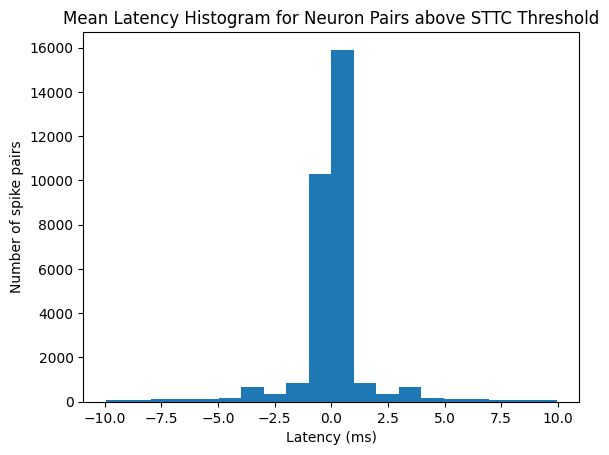

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def find_sttc_above_threshold(sd, threshold=0.3):
    sttc = np.zeros((sd.N, sd.N))
    for i in range(sd.N):
        for j in range(sd.N):
            sttc[i][j] = sd.spike_time_tiling(i, j)

    # Set diagonal values to -1
    np.fill_diagonal(sttc, -1)

    # Create a mask to filter STTC values above the given threshold
    mask = sttc > threshold

    # Find the indices of neuron pairs with STTC above the threshold
    neuron_pairs = np.transpose(np.where(mask))

    return neuron_pairs

# Assuming you have your SpikeData (sd) object and the function to calculate latencies
def calculate_mean_latency_histogram(sd, threshold=0.3):
    neuron_pairs = find_sttc_above_threshold(sd, threshold)
    latencies_list = []

    for neuron_pair in neuron_pairs:
        neuron1, neuron2 = neuron_pair
        lates_n1 = sd.latencies_to_index(neuron1)
        lates_raw = lates_n1[neuron2]
        lates = list(filter(lambda x: x < 10 and x > -10, lates_raw))
        latencies_list.extend(lates)

    plt.hist(latencies_list, bins=20)
    plt.xlabel("Latency (ms)")
    plt.ylabel("Number of spike pairs")
    plt.title("Mean Latency Histogram for Neuron Pairs above STTC Threshold")
    plt.show()

# Call the function with your SpikeData object and the desired STTC threshold
calculate_mean_latency_histogram(sd, threshold=0.6)

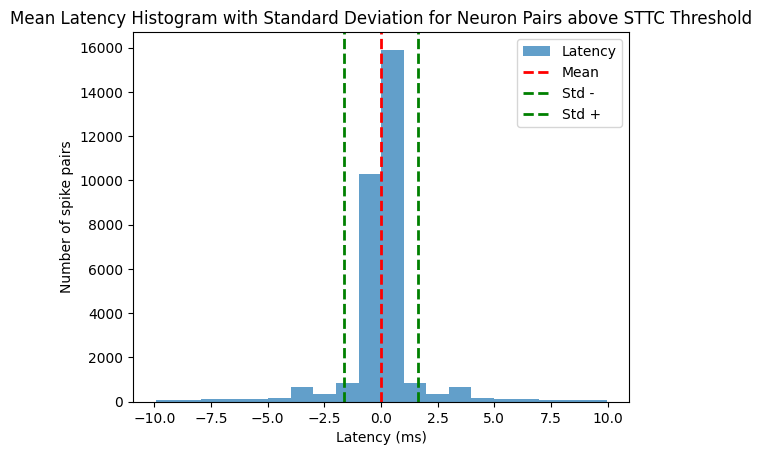

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def find_sttc_above_threshold(sd, threshold=0.3):
    sttc = np.zeros((sd.N, sd.N))
    for i in range(sd.N):
        for j in range(sd.N):
            sttc[i][j] = sd.spike_time_tiling(i, j)

    # Set diagonal values to -1
    np.fill_diagonal(sttc, -1)

    # Create a mask to filter STTC values above the given threshold
    mask = sttc > threshold

    # Find the indices of neuron pairs with STTC above the threshold
    neuron_pairs = np.transpose(np.where(mask))

    return neuron_pairs

# Assuming you have your SpikeData (sd) object and the function to calculate latencies
def calculate_mean_latency_histogram(sd, threshold=0.3):
    neuron_pairs = find_sttc_above_threshold(sd, threshold)
    latencies_list = []

    for neuron_pair in neuron_pairs:
        neuron1, neuron2 = neuron_pair
        lates_n1 = sd.latencies_to_index(neuron1)
        lates_raw = lates_n1[neuron2]
        lates = list(filter(lambda x: x < 10 and x > -10, lates_raw))
        latencies_list.extend(lates)

    mean_latency = np.mean(latencies_list)
    std_latency = np.std(latencies_list)

    plt.hist(latencies_list, bins=20, alpha=0.7, label='Latency')
    plt.axvline(mean_latency, color='red', linestyle='dashed', linewidth=2, label='Mean')
    plt.axvline(mean_latency - std_latency, color='green', linestyle='dashed', linewidth=2, label='Std -')
    plt.axvline(mean_latency + std_latency, color='green', linestyle='dashed', linewidth=2, label='Std +')

    plt.xlabel("Latency (ms)")
    plt.ylabel("Number of spike pairs")
    plt.title("Mean Latency Histogram with Standard Deviation for Neuron Pairs above STTC Threshold")
    plt.legend()
    plt.show()

# Call the function with your SpikeData object and the desired STTC threshold
calculate_mean_latency_histogram(sd, threshold=0.6)

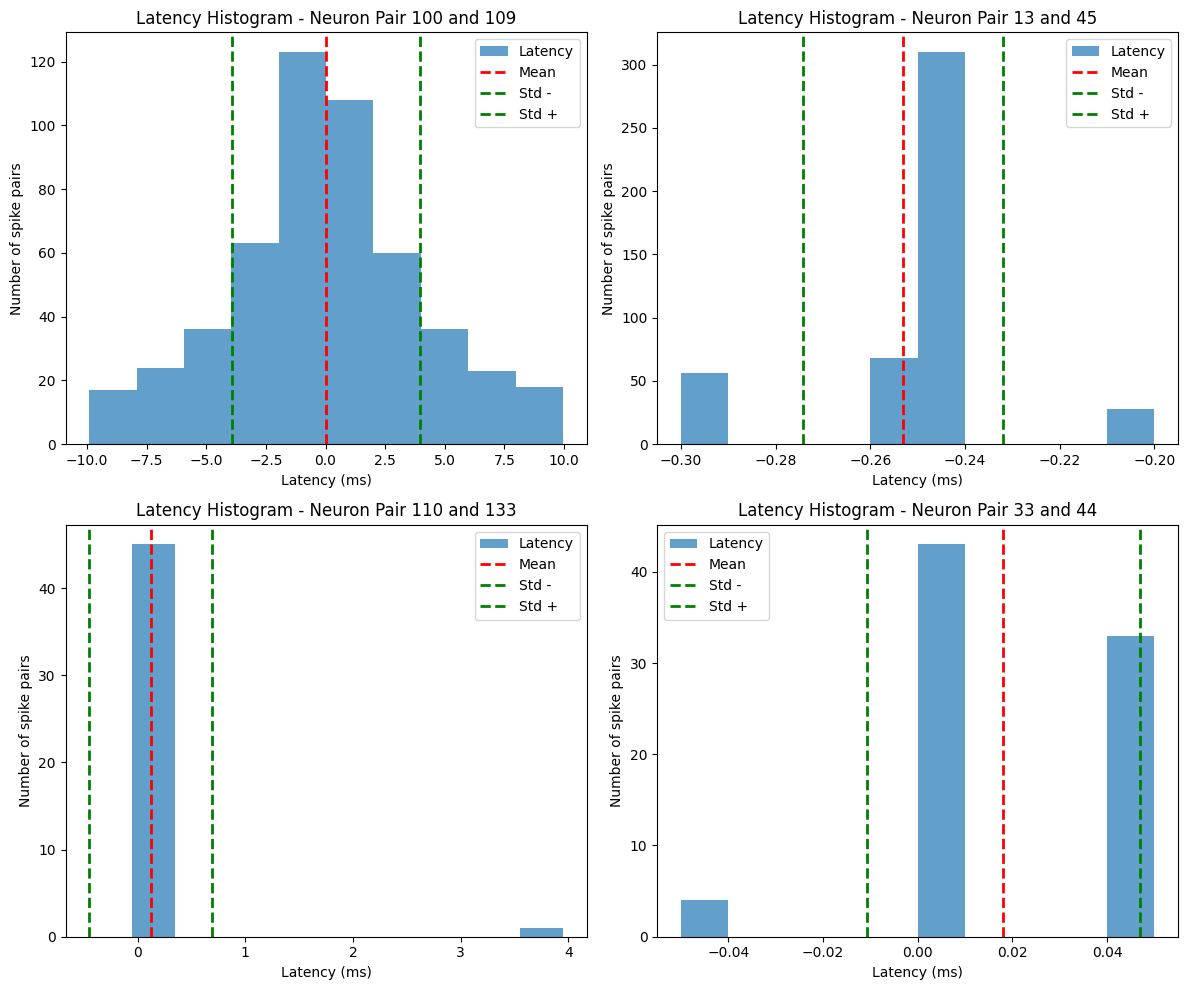

In [35]:
def plot_latency_histograms_for_random_pairs(sd, threshold=0.3, num_random_pairs=4):
    neuron_pairs = find_sttc_above_threshold(sd, threshold)

    # Get 'num_random_pairs' random indices to choose random neuron pairs
    random_indices = np.random.choice(neuron_pairs.shape[0], num_random_pairs, replace=False)
    random_neuron_pairs = neuron_pairs[random_indices]

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    axs = axs.ravel()

    for i, neuron_pair in enumerate(random_neuron_pairs):
        neuron1, neuron2 = neuron_pair
        lates_n1 = sd.latencies_to_index(neuron1)
        lates_raw = lates_n1[neuron2]
        lates = list(filter(lambda x: x < 10 and x > -10, lates_raw))

        mean_latency = np.mean(lates)
        std_latency = np.std(lates)

        axs[i].hist(lates, bins=10, alpha=0.7, label='Latency')
        axs[i].axvline(mean_latency, color='red', linestyle='dashed', linewidth=2, label='Mean')
        axs[i].axvline(mean_latency - std_latency, color='green', linestyle='dashed', linewidth=2, label='Std -')
        axs[i].axvline(mean_latency + std_latency, color='green', linestyle='dashed', linewidth=2, label='Std +')

        axs[i].set_xlabel("Latency (ms)")
        axs[i].set_ylabel("Number of spike pairs")
        axs[i].set_title(f"Latency Histogram - Neuron Pair {neuron1} and {neuron2}")
        axs[i].legend()

    plt.tight_layout()
    plt.show()

# Call the function with your SpikeData object, the desired STTC threshold, and the number of random pairs to plot
plot_latency_histograms_for_random_pairs(sd, threshold=0.3, num_random_pairs=4)

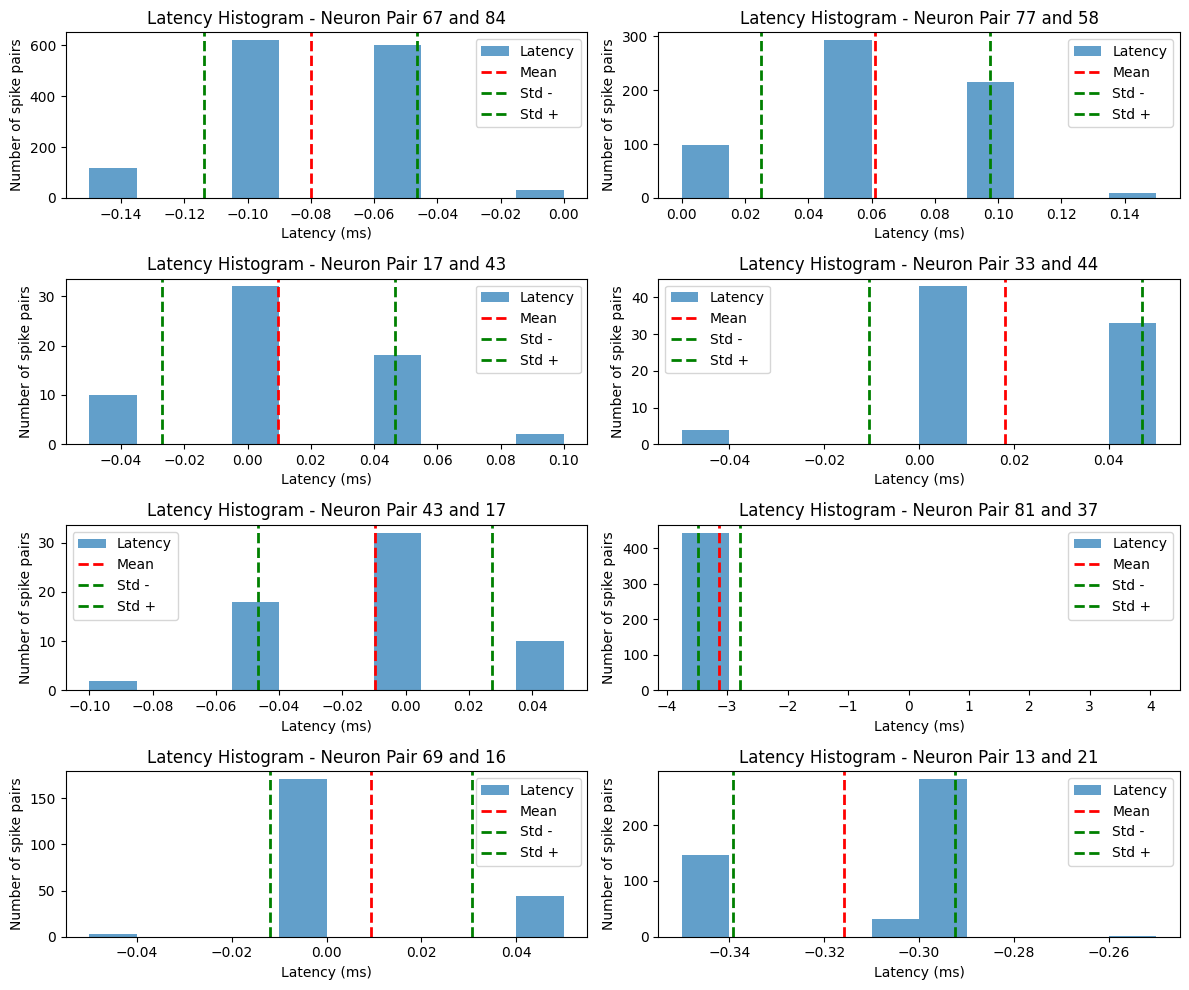

In [39]:
def plot_latency_histograms_for_random_pairs(sd, threshold=0.3, num_random_pairs=8):
    neuron_pairs = find_sttc_above_threshold(sd, threshold)

    # Get 'num_random_pairs' random indices to choose random neuron pairs
    random_indices = np.random.choice(neuron_pairs.shape[0], num_random_pairs, replace=False)
    random_neuron_pairs = neuron_pairs[random_indices]

    fig, axs = plt.subplots(4, 2, figsize=(12, 10))
    axs = axs.ravel()

    for i, neuron_pair in enumerate(random_neuron_pairs):
        neuron1, neuron2 = neuron_pair
        lates_n1 = sd.latencies_to_index(neuron1)
        lates_raw = lates_n1[neuron2]
        lates = list(filter(lambda x: x < 10 and x > -10, lates_raw))

        mean_latency = np.mean(lates)
        std_latency = np.std(lates)

        axs[i].hist(lates, bins=10, alpha=0.7, label='Latency')
        axs[i].axvline(mean_latency, color='red', linestyle='dashed', linewidth=2, label='Mean')
        axs[i].axvline(mean_latency - std_latency, color='green', linestyle='dashed', linewidth=2, label='Std -')
        axs[i].axvline(mean_latency + std_latency, color='green', linestyle='dashed', linewidth=2, label='Std +')

        axs[i].set_xlabel("Latency (ms)")
        axs[i].set_ylabel("Number of spike pairs")
        axs[i].set_title(f"Latency Histogram - Neuron Pair {neuron1} and {neuron2}")
        axs[i].legend()

    plt.tight_layout()
    plt.show()

# Call the function with your SpikeData object, the desired STTC threshold, and the number of random pairs to plot
plot_latency_histograms_for_random_pairs(sd, threshold=0.9, num_random_pairs=8)

64


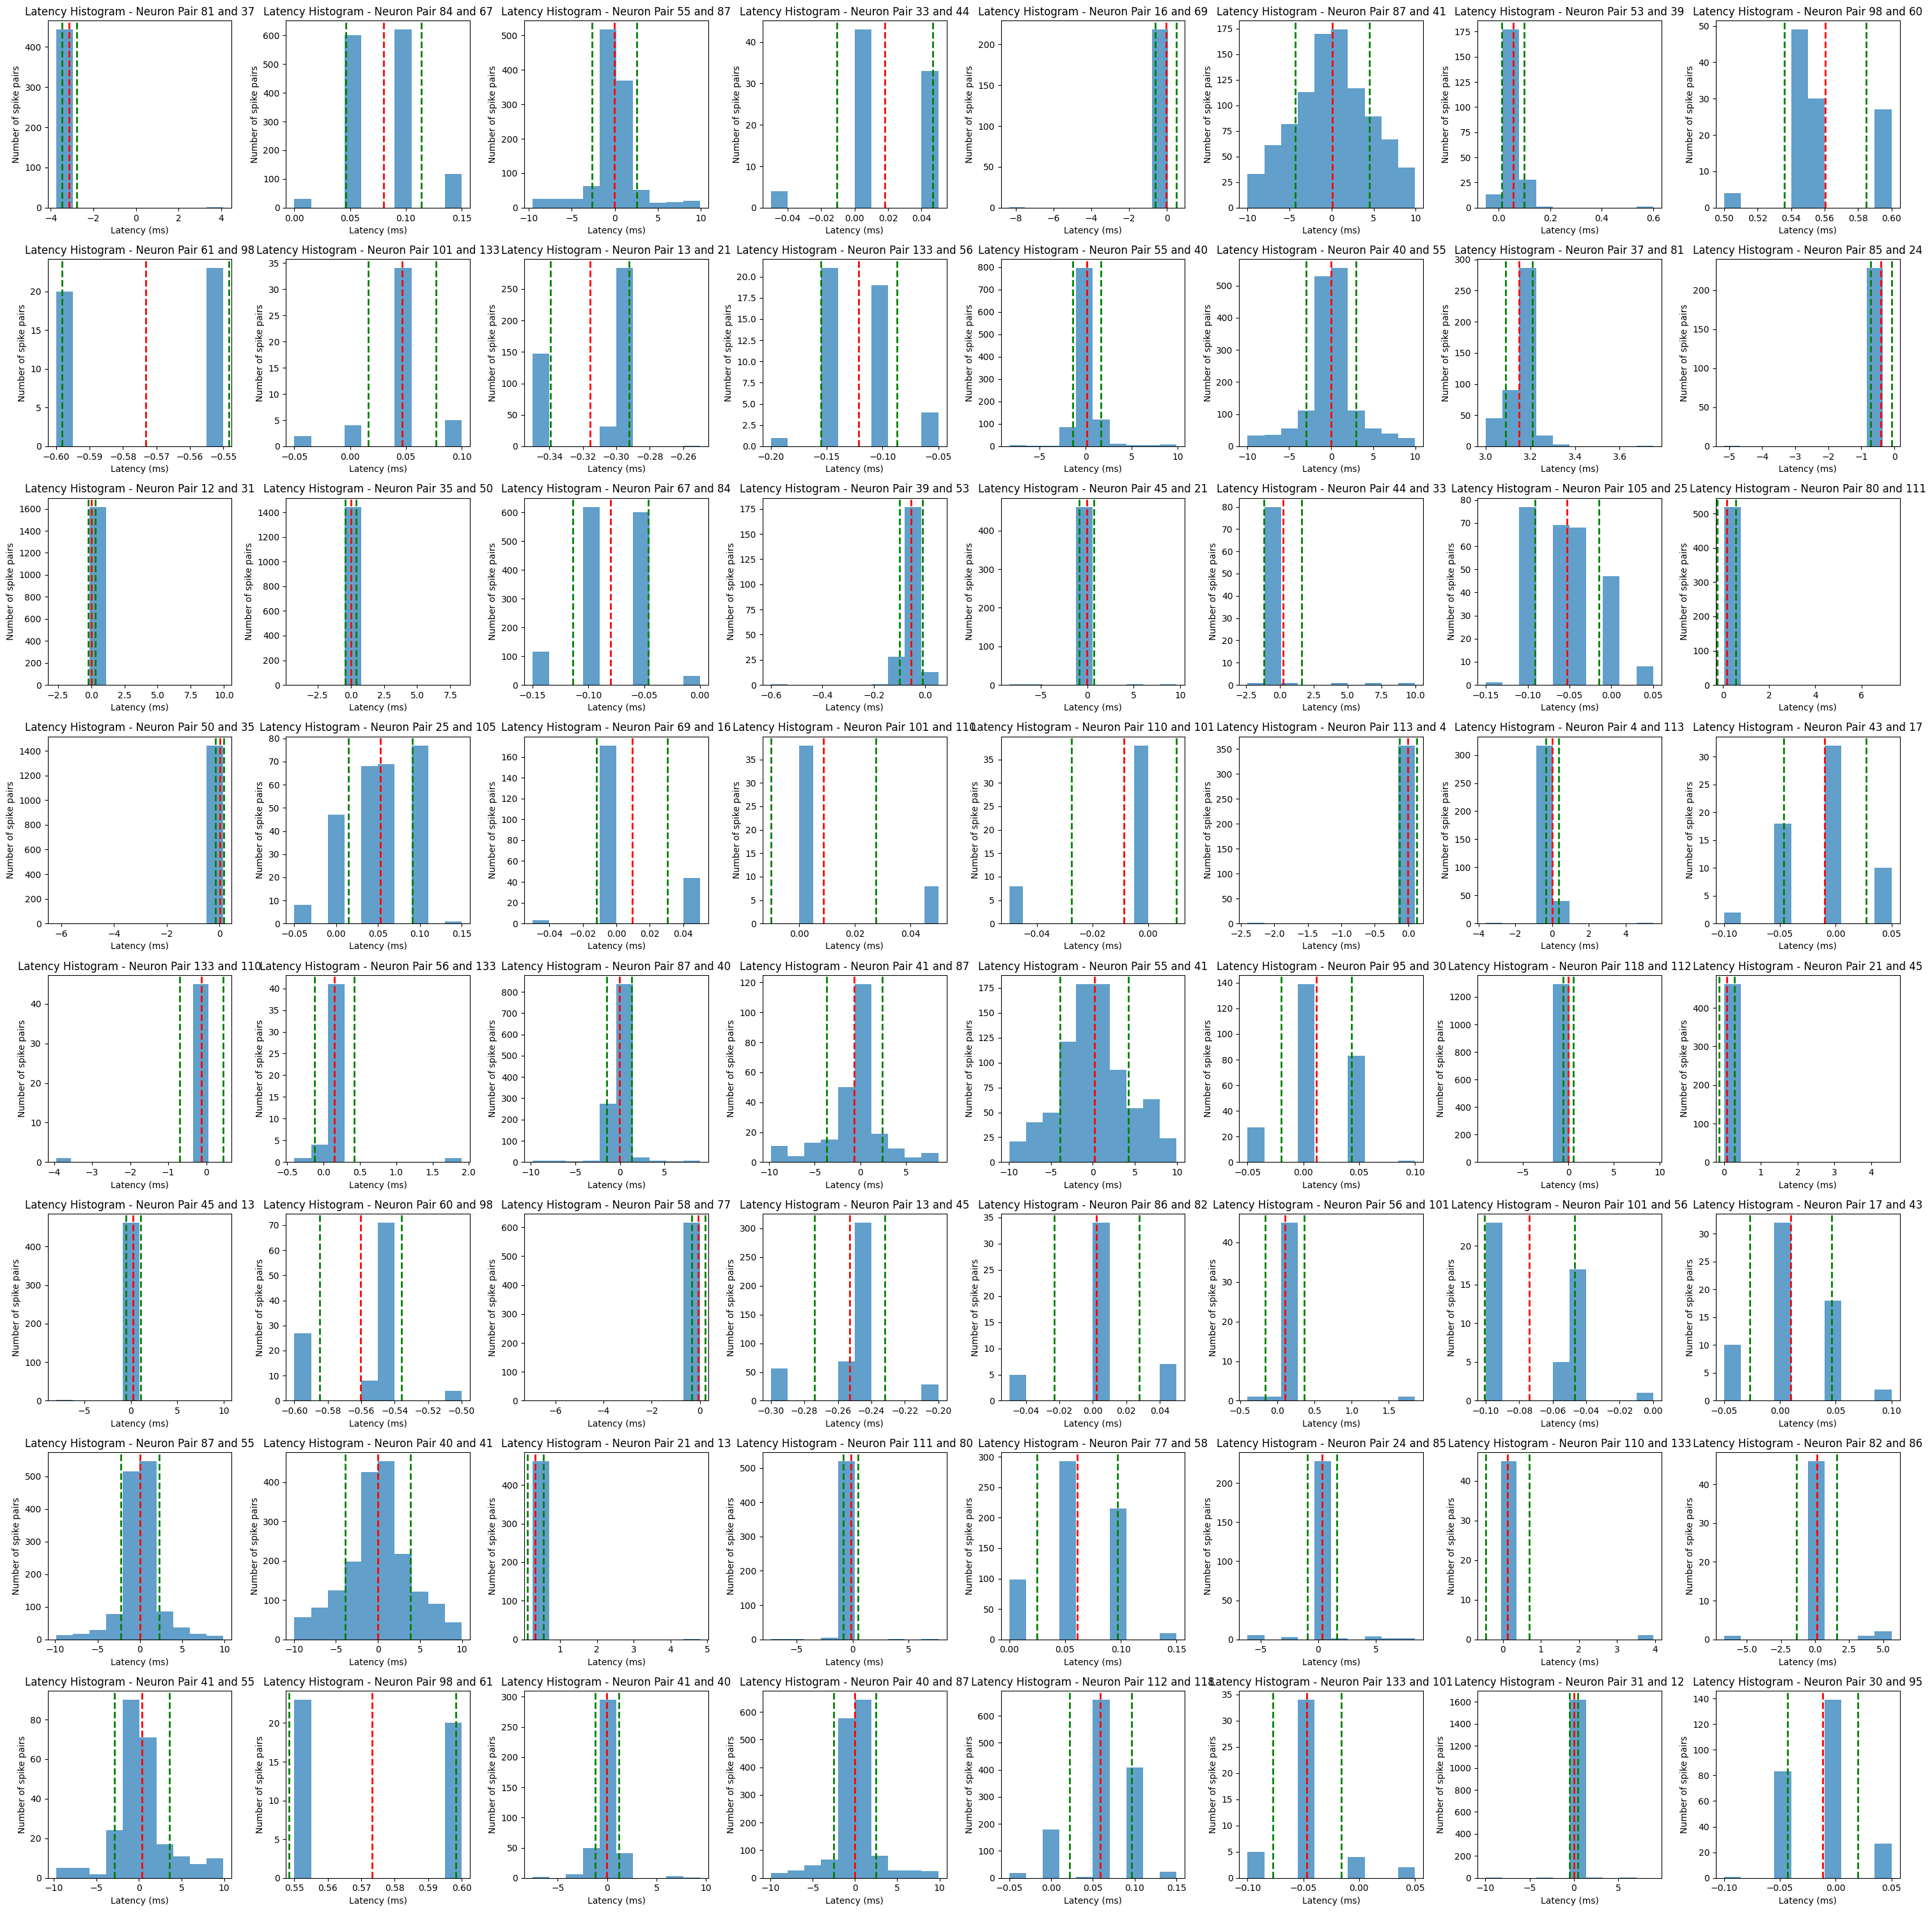

In [49]:
import numpy as np
import matplotlib.pyplot as plt

def plot_latency_histograms_for_random_pairs(sd, threshold=0.3, num_random_pairs=30):
    neuron_pairs = find_sttc_above_threshold(sd, threshold)
    
    print(len(neuron_pairs))

    # Get 'num_random_pairs' random indices to choose random neuron pairs
    random_indices = np.random.choice(neuron_pairs.shape[0], num_random_pairs, replace=False)
    random_neuron_pairs = neuron_pairs[random_indices]
    
    fig, axs = plt.subplots(8, 8, figsize=(30, 30))
    axs = axs.ravel()

    for i, neuron_pair in enumerate(random_neuron_pairs):
        neuron1, neuron2 = neuron_pair
        lates_n1 = sd.latencies_to_index(neuron1)
        lates_raw = lates_n1[neuron2]
        lates = list(filter(lambda x: x < 10 and x > -10, lates_raw))

        mean_latency = np.mean(lates)
        std_latency = np.std(lates)

        axs[i].hist(lates, bins=10, alpha=0.7, label='Latency')
        axs[i].axvline(mean_latency, color='red', linestyle='dashed', linewidth=2, label='Mean')
        axs[i].axvline(mean_latency - std_latency, color='green', linestyle='dashed', linewidth=2, label='Std -')
        axs[i].axvline(mean_latency + std_latency, color='green', linestyle='dashed', linewidth=2, label='Std +')

        axs[i].set_xlabel("Latency (ms)")
        axs[i].set_ylabel("Number of spike pairs")
        axs[i].set_title(f"Latency Histogram - Neuron Pair {neuron1} and {neuron2}")
#         axs[i].legend(loc='upper right')

    # Hide unused subplots
    for i in range(num_random_pairs, len(axs)):
        axs[i].axis('off')

    plt.tight_layout()
    plt.savefig('LatencyDistributions.png')
    plt.show()

# Call the function with your SpikeData object, the desired STTC threshold, and the number of random pairs to plot
plot_latency_histograms_for_random_pairs(sd, threshold=0.48, num_random_pairs=64)

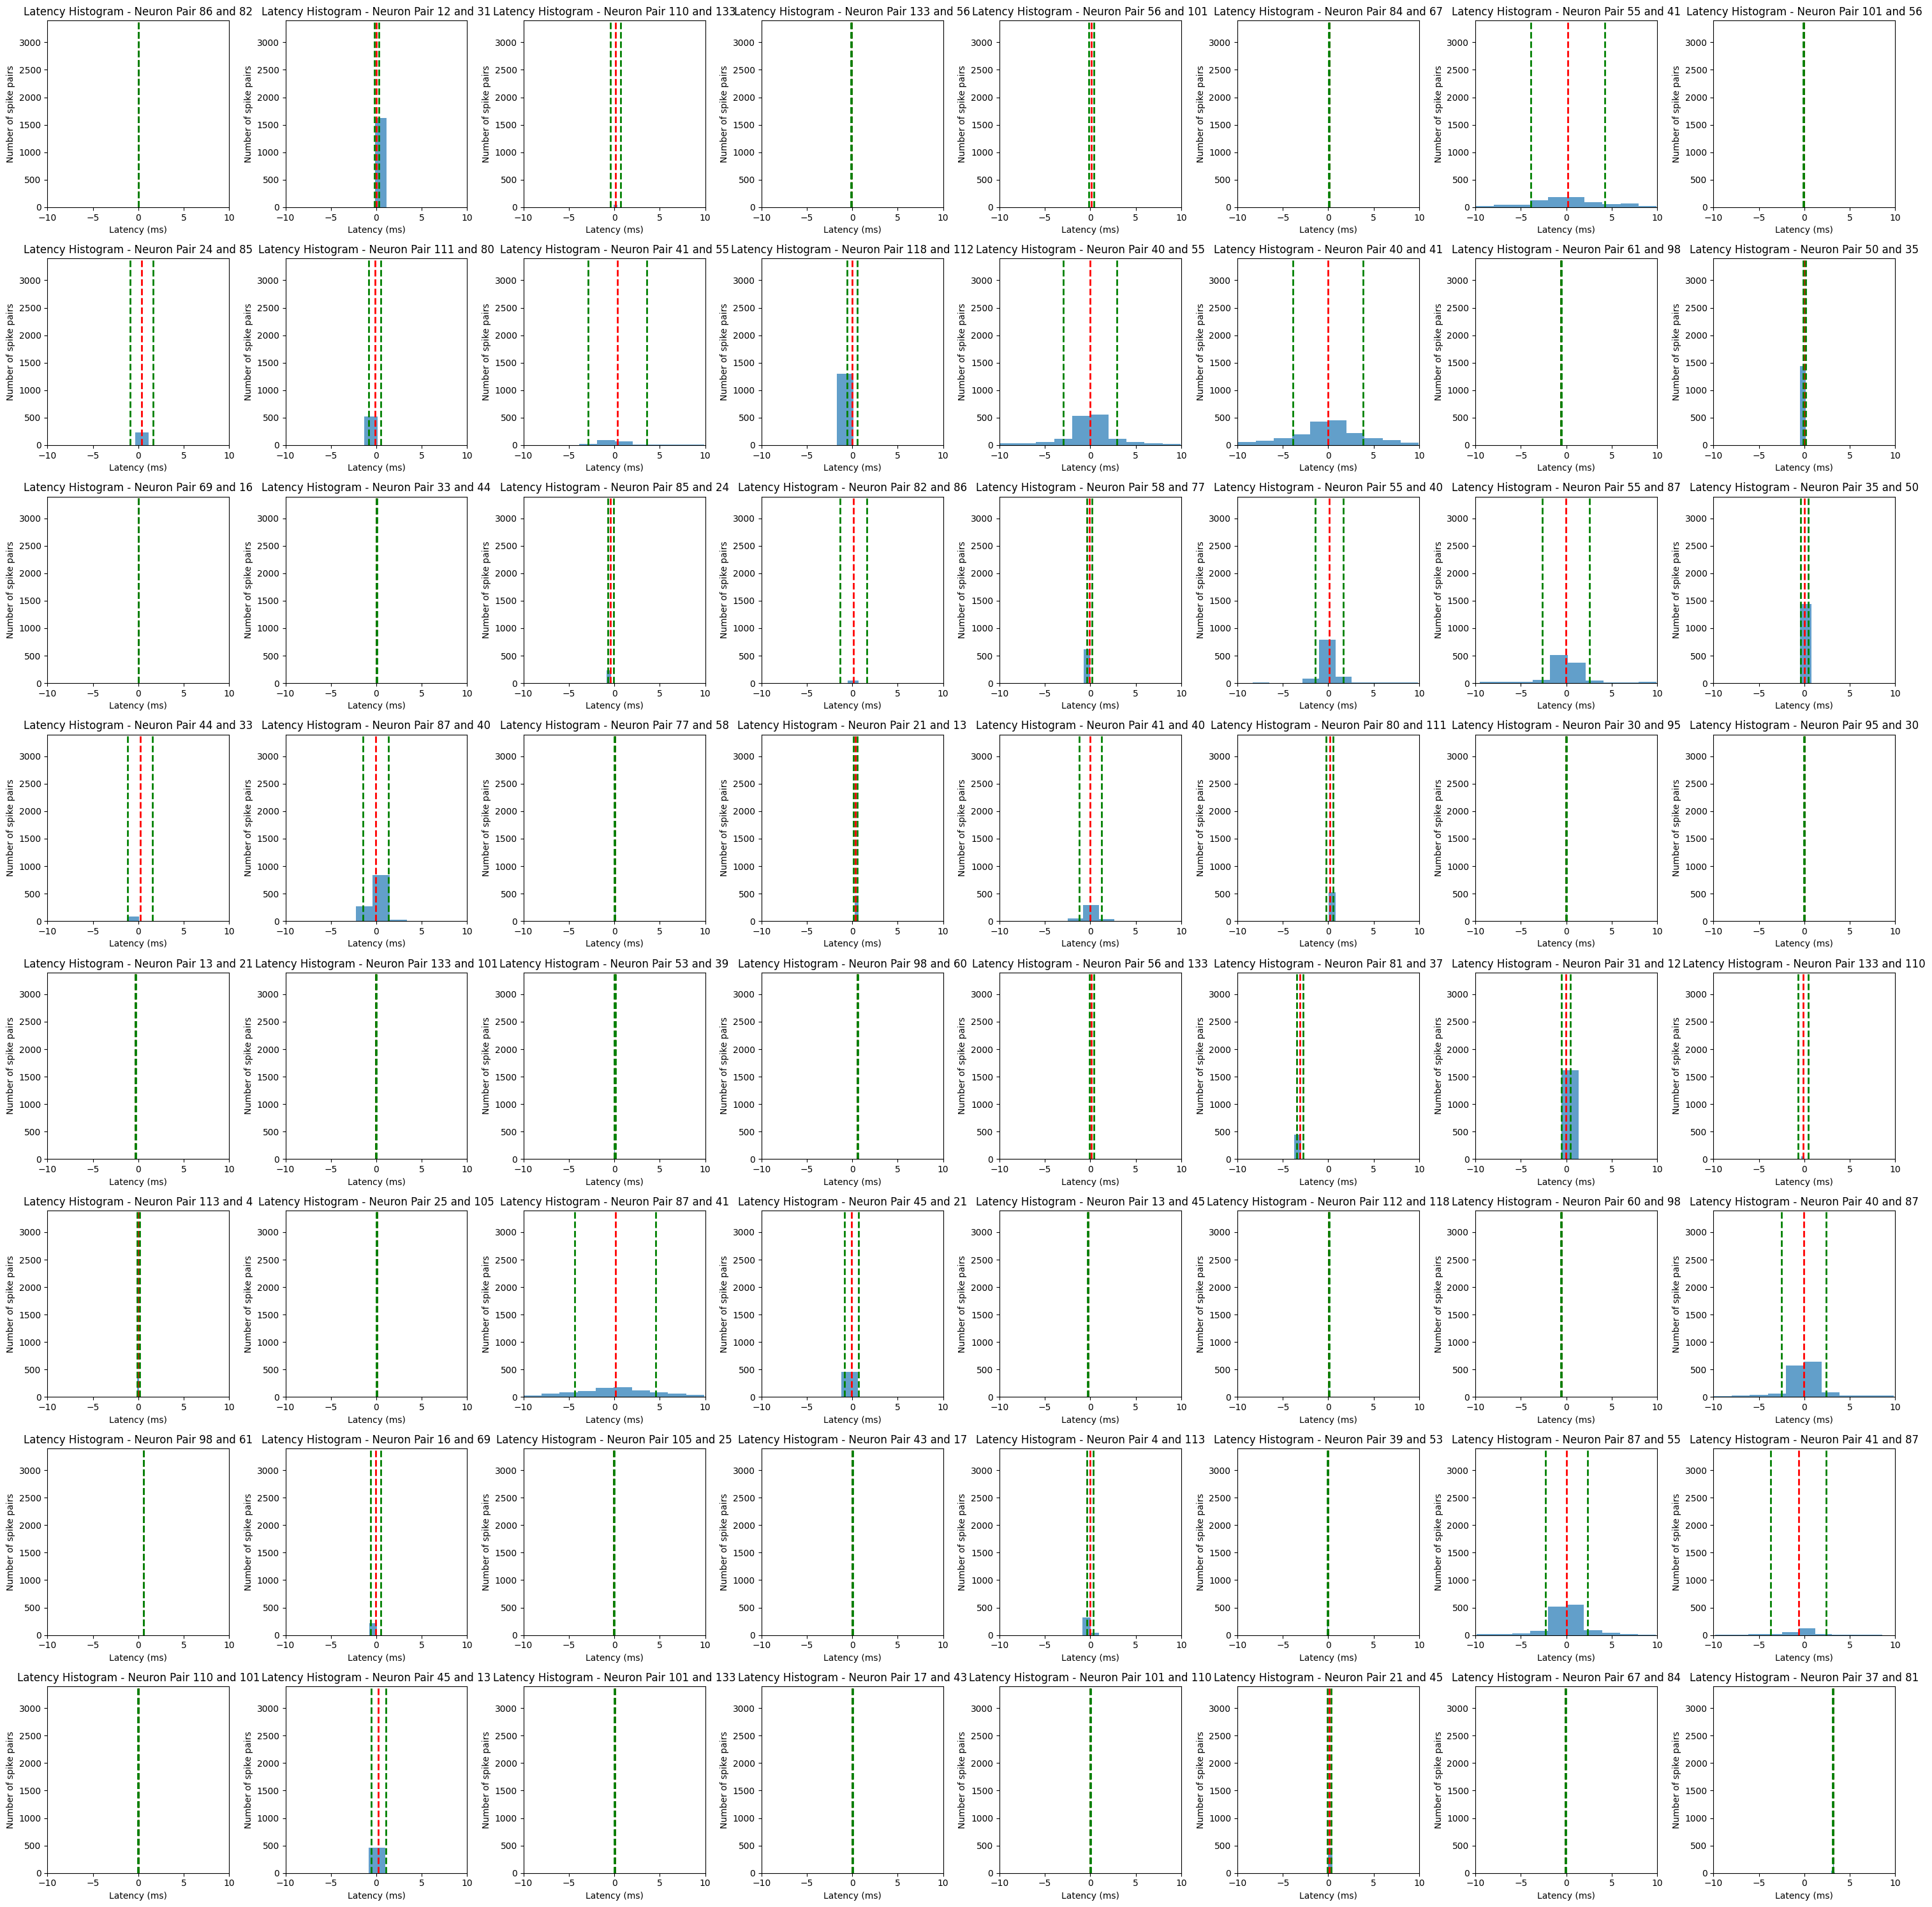

In [50]:
import numpy as np
import matplotlib.pyplot as plt

def plot_latency_histograms_for_random_pairs(sd, threshold=0.3, num_random_pairs=30):
    neuron_pairs = find_sttc_above_threshold(sd, threshold)

    # Get 'num_random_pairs' random indices to choose random neuron pairs
    random_indices = np.random.choice(neuron_pairs.shape[0], num_random_pairs, replace=False)
    random_neuron_pairs = neuron_pairs[random_indices]
    
    fig, axs = plt.subplots(8, 8, figsize=(30, 30))
    axs = axs.ravel()

    # Collect latency data from all neuron pairs
    all_lates = []

    for i, neuron_pair in enumerate(random_neuron_pairs):
        neuron1, neuron2 = neuron_pair
        lates_n1 = sd.latencies_to_index(neuron1)
        lates_raw = lates_n1[neuron2]
        lates = list(filter(lambda x: x < 10 and x > -10, lates_raw))

        all_lates.extend(lates)  # Collect all latencies for setting common axis limits

        mean_latency = np.mean(lates)
        std_latency = np.std(lates)

        axs[i].hist(lates, bins=10, alpha=0.7, label='Latency')
        axs[i].axvline(mean_latency, color='red', linestyle='dashed', linewidth=2, label='Mean')
        axs[i].axvline(mean_latency - std_latency, color='green', linestyle='dashed', linewidth=2, label='Std -')
        axs[i].axvline(mean_latency + std_latency, color='green', linestyle='dashed', linewidth=2, label='Std +')

        axs[i].set_xlabel("Latency (ms)")
        axs[i].set_ylabel("Number of spike pairs")
        axs[i].set_title(f"Latency Histogram - Neuron Pair {neuron1} and {neuron2}")

    # Calculate common axis limits from all latencies
    common_x_limit = (-10, 10)  # You can adjust the range if needed
    common_y_limit = (0, len(all_lates)//10)  # Dividing by 10 just to set a reasonable range for the y-axis

    # Set common axis limits for all subplots
    for ax in axs:
        ax.set_xlim(common_x_limit)
        ax.set_ylim(common_y_limit)

    # Hide unused subplots
    for i in range(num_random_pairs, len(axs)):
        axs[i].axis('off')

    plt.tight_layout()
    plt.savefig('LatencyDistributions.png')
    plt.show()

# Call the function with your SpikeData object, the desired STTC threshold, and the number of random pairs to plot
plot_latency_histograms_for_random_pairs(sd, threshold=0.48, num_random_pairs=64)

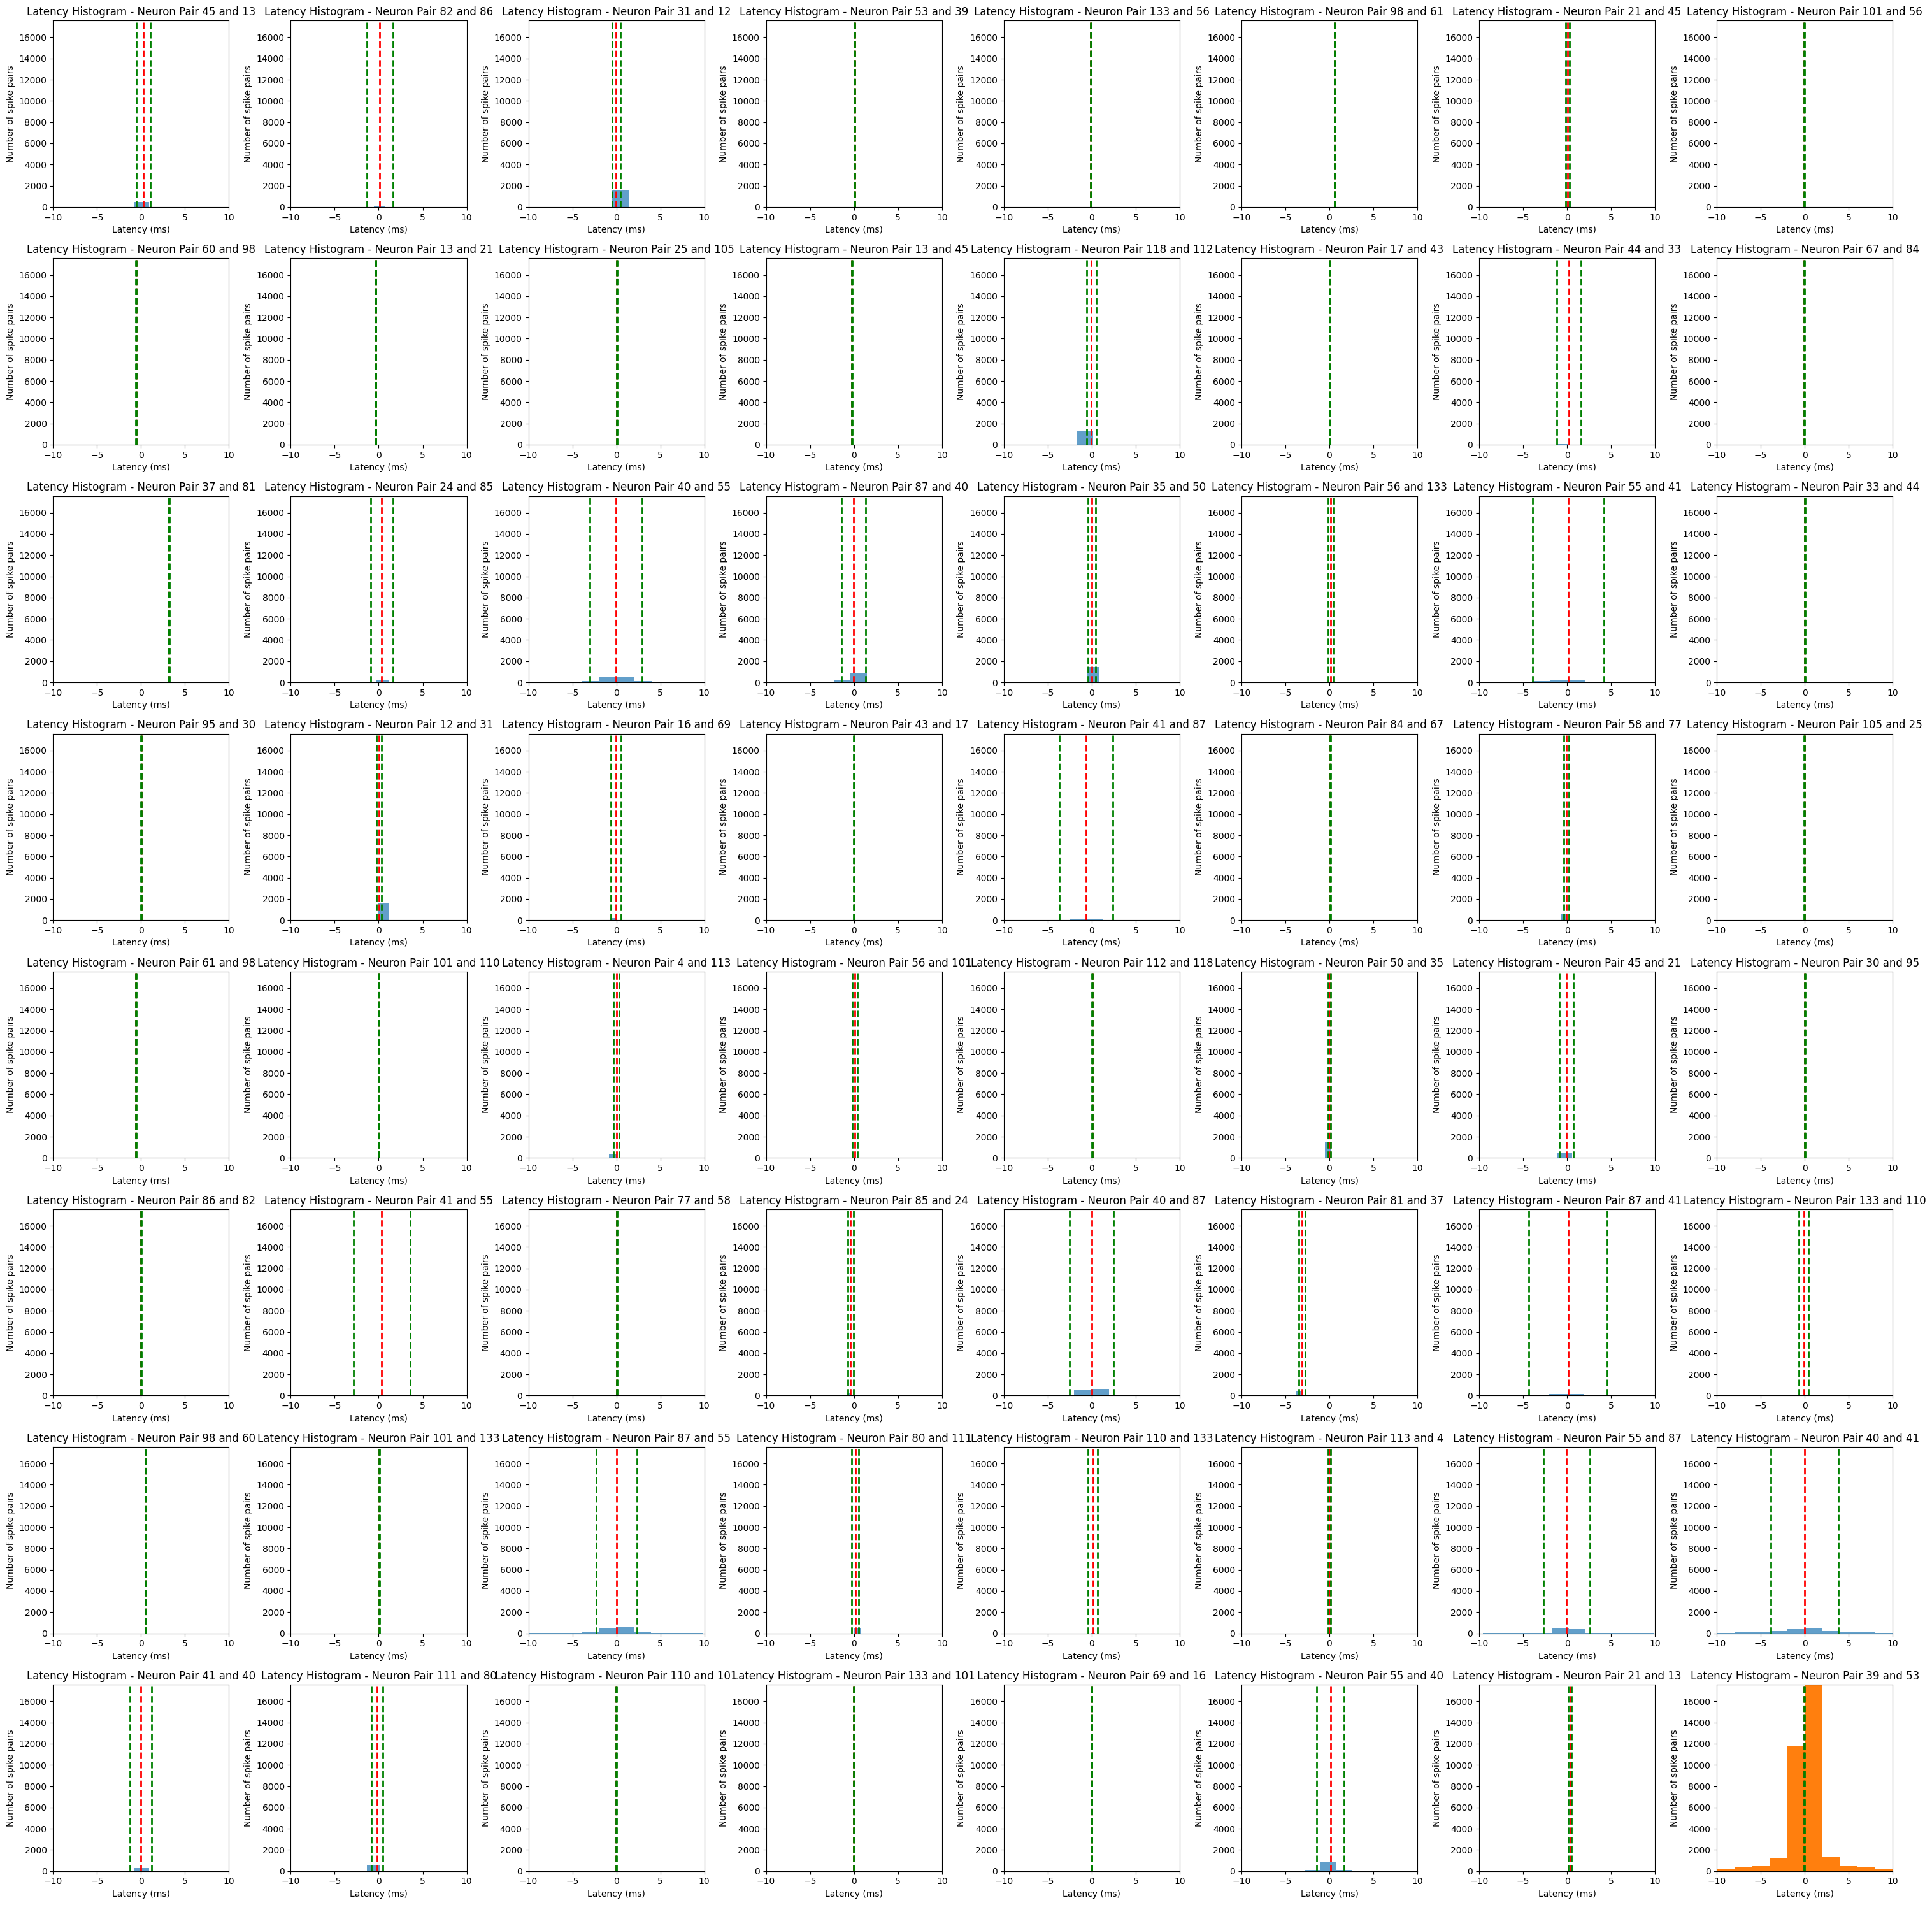

In [51]:
import numpy as np
import matplotlib.pyplot as plt

def plot_latency_histograms_for_random_pairs(sd, threshold=0.3, num_random_pairs=30):
    neuron_pairs = find_sttc_above_threshold(sd, threshold)

    # Get 'num_random_pairs' random indices to choose random neuron pairs
    random_indices = np.random.choice(neuron_pairs.shape[0], num_random_pairs, replace=False)
    random_neuron_pairs = neuron_pairs[random_indices]
    
    fig, axs = plt.subplots(8, 8, figsize=(30, 30))
    axs = axs.ravel()

    # List to collect latency data from all neuron pairs
    all_lates = []

    for i, neuron_pair in enumerate(random_neuron_pairs):
        neuron1, neuron2 = neuron_pair
        lates_n1 = sd.latencies_to_index(neuron1)
        lates_raw = lates_n1[neuron2]
        lates = list(filter(lambda x: x < 10 and x > -10, lates_raw))

        all_lates.extend(lates)  # Collect all latencies for setting common axis limits

        mean_latency = np.mean(lates)
        std_latency = np.std(lates)

        axs[i].hist(lates, bins=10, alpha=0.7, label='Latency')
        axs[i].axvline(mean_latency, color='red', linestyle='dashed', linewidth=2, label='Mean')
        axs[i].axvline(mean_latency - std_latency, color='green', linestyle='dashed', linewidth=2, label='Std -')
        axs[i].axvline(mean_latency + std_latency, color='green', linestyle='dashed', linewidth=2, label='Std +')

        axs[i].set_xlabel("Latency (ms)")
        axs[i].set_ylabel("Number of spike pairs")
        axs[i].set_title(f"Latency Histogram - Neuron Pair {neuron1} and {neuron2}")

    # Calculate common x-axis limits from all latencies
    common_x_limit = (-10, 10)  # You can adjust the range if needed

    # Determine appropriate y-axis limits for each row based on the maximum number of spike pairs in that row
    max_spike_pairs = max(plt.hist(all_lates, bins=10)[0])
    y_limits = [(0, max_spike_pairs)] * 8  # Assuming 8 rows

    # Set common x-axis limits for all subplots and individual y-axis limits for each row
    for i, ax in enumerate(axs):
        ax.set_xlim(common_x_limit)
        ax.set_ylim(y_limits[i // 8])  # Set the y-axis limit based on the row

    # Hide unused subplots
    for i in range(num_random_pairs, len(axs)):
        axs[i].axis('off')

    plt.tight_layout()
    plt.savefig('LatencyDistributionsScaled.png')
    plt.show()

# Call the function with your SpikeData object, the desired STTC threshold, and the number of random pairs to plot
plot_latency_histograms_for_random_pairs(sd, threshold=0.48, num_random_pairs=64)